<a href="https://www.kaggle.com/code/areejrohyiem/movie-industry-eda?scriptVersionId=216898955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  **Load and Understand the Data**

In [2]:
df=pd.read_csv('/kaggle/input/movies/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# Clean the Data

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
missing_data = df.isnull().sum()
missing_data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
df['gross'] = df['gross'].fillna(0)
df['budget'] = df['budget'].fillna(0)

# Convert the columns from float64 to int64
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [10]:
df['released'] = df['released'].replace(r"\s\([^)]*\)", "", regex=True)

# Convert to datetime format
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

# Check the result
print(df['released'].head())

0   1980-06-13
1   1980-07-02
2   1980-06-20
3   1980-07-02
4   1980-07-25
Name: released, dtype: datetime64[ns]


In [11]:
df['released'].dtype

dtype('<M8[ns]')

In [12]:
df.sort_values(by=['gross'],inplace=False , ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [13]:
# drop duplicates
df['company'].drop_duplicates().sort_values()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
408                                     NaN
Name: company, Length: 2386, dtype: object

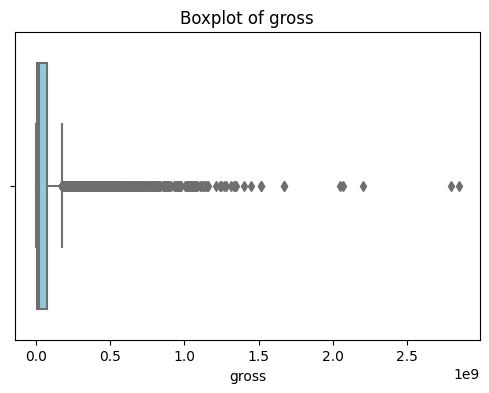

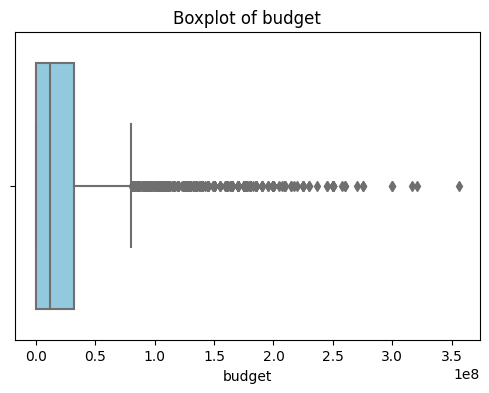

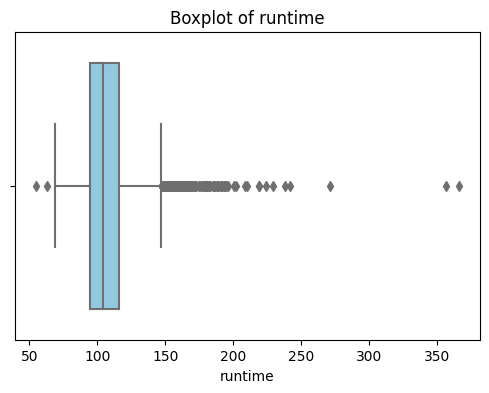

In [14]:
# detect the outliers 
numeric_columns = ['gross', 'budget', 'runtime']


for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [15]:
#to list outliers of gross 
Q1 = df['gross'].quantile(0.25)
Q3 = df['gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['gross'] < lower_bound) | (df['gross'] > upper_bound)]
print(outliers)


                                                name     rating      genre  \
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
92     Indiana Jones and the Raiders of the Lost Ark         PG     Action   
209                       E.T. the Extra-Terrestrial         PG     Family   
221                                          Tootsie         PG     Comedy   
333       Star Wars: Episode VI - Return of the Jedi         PG     Action   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   
7655                           Legend of Deification      TV-PG  Animation   

      year   released  score      votes          director      

In [16]:
#to list outliers of budget 
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['budget'] < lower_bound) | (df['budget'] > upper_bound)]
print(outliers)


                            name rating      genre  year   released  score  \
1843  Terminator 2: Judgment Day      R     Action  1991 1991-07-03    8.5   
2262            Last Action Hero  PG-13     Action  1993 1993-06-18    6.4   
2447                   True Lies      R     Action  1994 1994-07-15    7.2   
2652              Batman Forever  PG-13     Action  1995 1995-06-16    5.4   
2656   Die Hard with a Vengeance      R     Action  1995 1995-05-19    7.6   
...                          ...    ...        ...   ...        ...    ...   
7645               Birds of Prey      R     Action  2020 2020-02-07    6.1   
7648           Bad Boys for Life      R     Action  2020 2020-01-17    6.6   
7649          Sonic the Hedgehog     PG     Action  2020 2020-02-14    6.5   
7650                    Dolittle     PG  Adventure  2020 2020-01-17    5.6   
7651        The Call of the Wild     PG  Adventure  2020 2020-02-21    6.8   

          votes         director              writer           

In [17]:
#to list outliers of runtime 
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['runtime'] < lower_bound) | (df['runtime'] > upper_bound)]
print(outliers)

                                  name     rating      genre  year   released  \
21                       Heaven's Gate          R  Adventure  1980 1981-04-24   
49                  Lion of the Desert         PG  Biography  1980 1981-05-16   
66    Moscow Does Not Believe in Tears         PG     Comedy  1980 1980-02-11   
102                           Das Boot        NaN  Adventure  1981 1982-02-10   
115                               Reds         PG  Biography  1981 1981-12-25   
...                                ...        ...        ...   ...        ...   
7613          42nd Street: The Musical  Not Rated    Musical  2019 2019-05-01   
7634             My People, My Country        NaN      Drama  2019 2019-10-01   
7643                             Tenet      PG-13     Action  2020 2020-09-03   
7644                 Wonder Woman 1984      PG-13     Action  2020 2020-12-25   
7652                 The Eight Hundred  Not Rated     Action  2020 2020-08-28   

      score     votes      

# **Exploratory Data Analysis (EDA)** 

In [18]:
# Number of movies produced each year
movies_per_year = df.groupby('year')['name'].count()
movies_per_year

year
1980     92
1981    113
1982    126
1983    144
1984    168
1985    200
1986    200
1987    200
1988    200
1989    200
1990    200
1991    200
1992    200
1993    200
1994    200
1995    200
1996    200
1997    200
1998    200
1999    200
2000    200
2001    200
2002    200
2003    200
2004    200
2005    200
2006    200
2007    200
2008    200
2009    200
2010    200
2011    200
2012    200
2013    200
2014    200
2015    200
2016    200
2017    200
2018    200
2019    200
2020     25
Name: name, dtype: int64

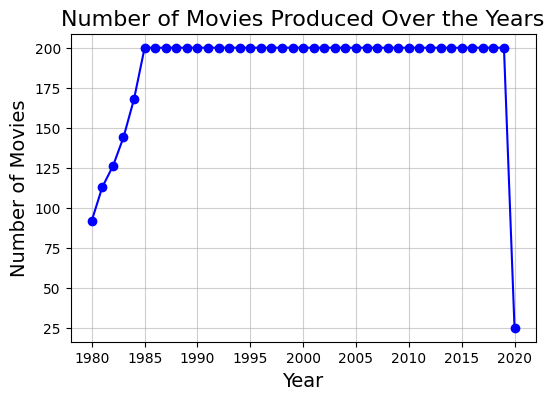

In [19]:
# plot 
plt.figure(figsize=(6, 4))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='b', linestyle='-')
plt.title("Number of Movies Produced Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, alpha=0.6)
plt.show()

In [20]:
# Average budget and gross revenue per year
avg_budget_gross = df.groupby('year')[['budget', 'gross']].mean()
avg_budget_gross

,budget,gross
year,,
1980,6.183152e+06,2.699638e+07
1981,6.278319e+06,2.230146e+07
1982,6.640238e+06,2.529826e+07
1983,6.208164e+06,1.909725e+07
1984,6.644798e+06,2.103031e+07
1985,6.102550e+06,1.845755e+07
1986,6.323937e+06,1.823756e+07
1987,6.912713e+06,2.016717e+07
1988,8.652700e+06,2.420193e+07


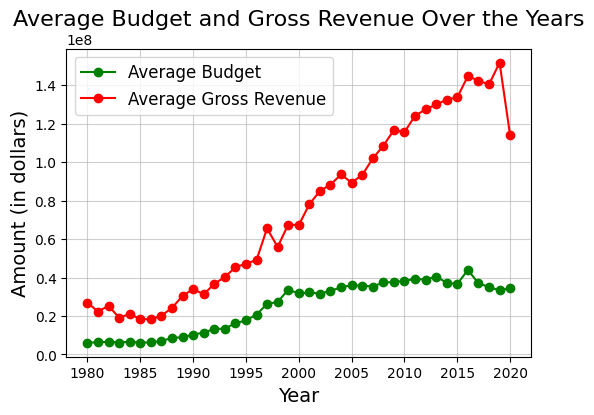

In [21]:
# Plot the average budget and gross revenue trends
plt.figure(figsize=(6, 4))
plt.plot(avg_budget_gross.index, avg_budget_gross['budget'], label='Average Budget', marker='o', color='g')
plt.plot(avg_budget_gross.index, avg_budget_gross['gross'], label='Average Gross Revenue', marker='o', color='r')
plt.title("Average Budget and Gross Revenue Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (in dollars)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.6)
plt.show()

In [22]:
# Select relevant numeric columns for correlation analysis
correlation_columns = ['budget', 'gross', 'score', 'votes']
correlation_matrix = df[correlation_columns].corr()
correlation_matrix

,budget,gross,score,votes
budget,1.000000,0.750157,0.055665,0.486862
gross,0.750157,1.000000,0.186392,0.632834
score,0.055665,0.186392,1.000000,0.409182
votes,0.486862,0.632834,0.409182,1.000000


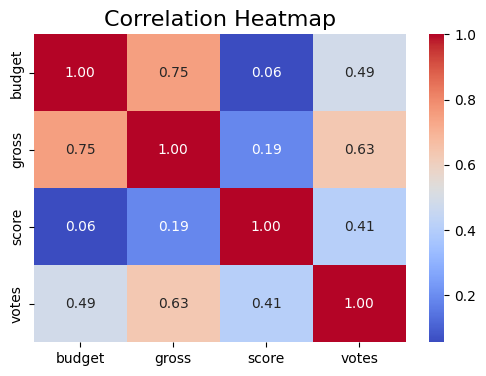

In [23]:
# Heatmap for correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

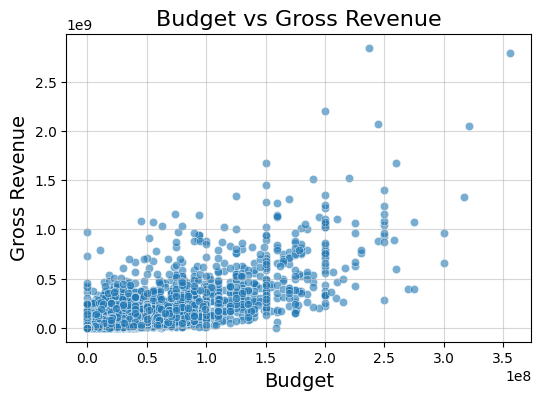

In [24]:
# Scatter plot to check relationship between budget and gross
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='budget', y='gross', alpha=0.6)
plt.title("Budget vs Gross Revenue", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Gross Revenue", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

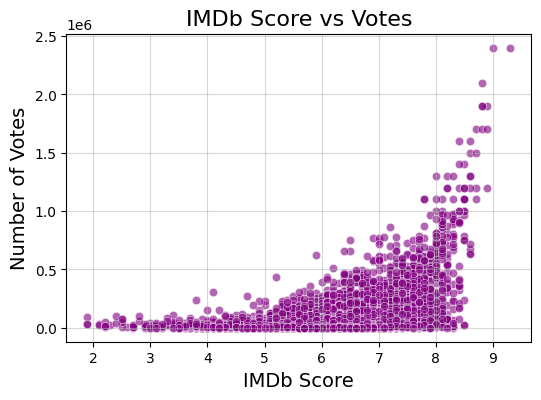

In [25]:
# Scatter plot to check relationship between score and votes
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='score', y='votes', alpha=0.6, color='purple')
plt.title("IMDb Score vs Votes", fontsize=16)
plt.xlabel("IMDb Score", fontsize=14)
plt.ylabel("Number of Votes", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [26]:
df['genre'].nunique()

19

In [27]:
# Group by genre and calculate average gross and total votes
genre_analysis = df.groupby('genre')[['gross', 'votes']].mean().sort_values(by='gross', ascending=False)
genre_analysis

,gross,votes
genre,,
Animation,2.371066e+08,127672.952663
Family,1.961725e+08,68504.545455
Action,1.427776e+08,140575.814554
Adventure,1.075330e+08,101541.550351
Mystery,1.011835e+08,230125.750000
Biography,4.679364e+07,90422.839729
Horror,4.516562e+07,68084.850932
Comedy,4.328529e+07,54283.183964
Crime,3.875762e+07,90930.219601


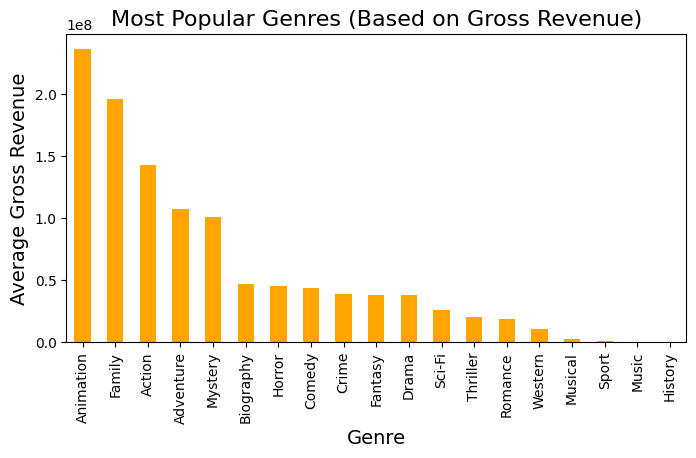

In [28]:
# Plot the most popular genres based on gross revenue
plt.figure(figsize=(8, 4))
genre_analysis['gross'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Most Popular Genres (Based on Gross Revenue)", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

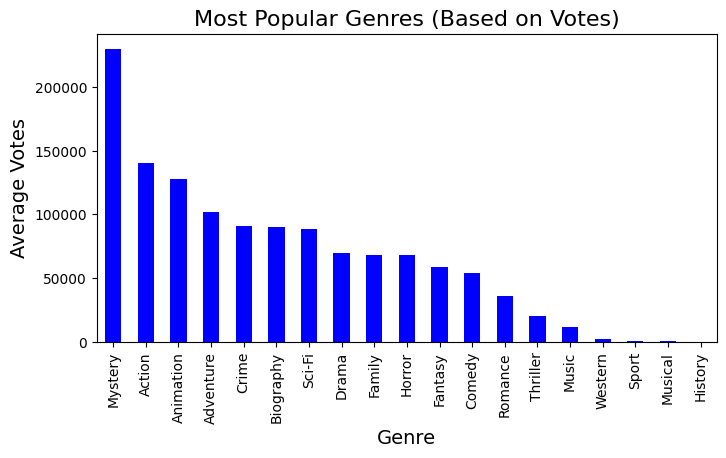

In [29]:
# Plot the most popular genres based on votes
plt.figure(figsize=(8, 4))
genre_analysis['votes'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title("Most Popular Genres (Based on Votes)", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average Votes", fontsize=14)
plt.show()

In [30]:
# Top directors by average gross revenue
top_directors = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)
top_directors

director
Anthony Russo       1.368850e+09
Kyle Balda          1.097122e+09
Josh Cooley         1.073395e+09
Chris Buck          1.059909e+09
Lee Unkrich         9.373943e+08
James Cameron       8.925841e+08
David Yates         8.602274e+08
George Lucas        8.497511e+08
J.J. Abrams         7.765626e+08
Robert Stromberg    7.584118e+08
Name: gross, dtype: float64

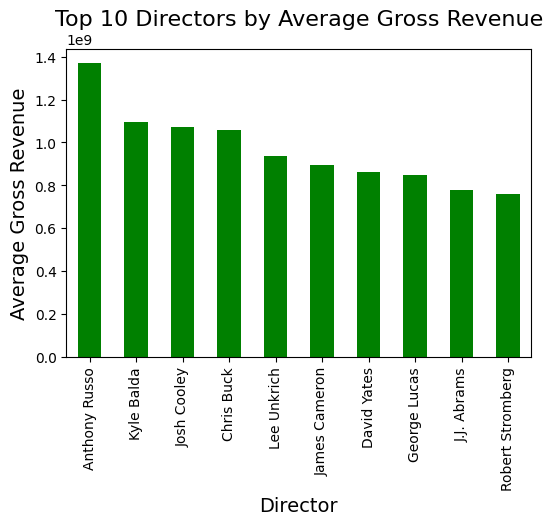

In [31]:
# Plot top 10 directors
plt.figure(figsize=(6, 4))
top_directors.plot(kind='bar', color='green')
plt.title("Top 10 Directors by Average Gross Revenue", fontsize=16)
plt.xlabel("Director", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

In [32]:
# Top stars by average gross revenue
top_stars = df.groupby('star')['gross'].mean().sort_values(ascending=False).head(10)
top_stars

star
Donald Glover       1.670728e+09
Daisy Ridley        1.120174e+09
Neel Sethi          9.665549e+08
Craig T. Nelson     9.381233e+08
Chris Pratt         8.797427e+08
Louis C.K.          8.754586e+08
Anthony Gonzalez    8.078179e+08
Yanting Lü          7.262641e+08
Tom Holland         7.180152e+08
Bill Skarsgård      7.017964e+08
Name: gross, dtype: float64

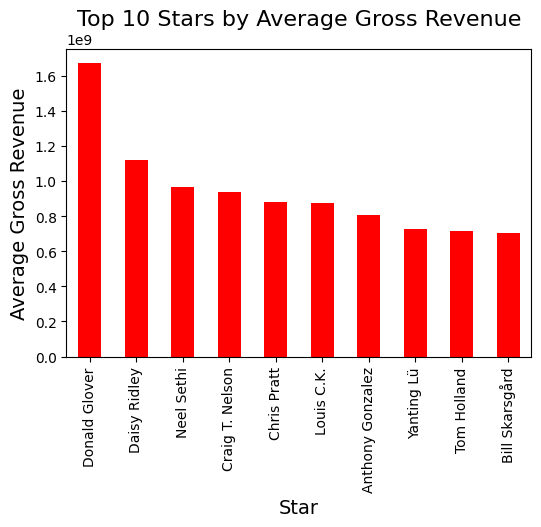

In [33]:
# Plot top 10 stars
plt.figure(figsize=(6, 4))
top_stars.plot(kind='bar', color='red')
plt.title("Top 10 Stars by Average Gross Revenue", fontsize=16)
plt.xlabel("Star", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

In [34]:
# Count movies by rating
rating_counts = df['rating'].value_counts()
rating_counts

rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

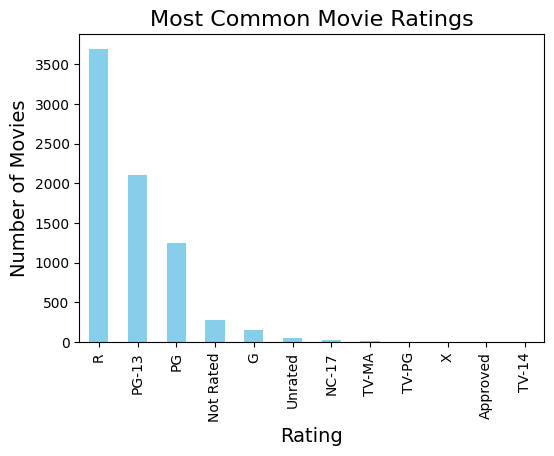

In [35]:
# Plot most common ratings
plt.figure(figsize=(6, 4))
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Movie Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.show()

In [36]:
# Group by year and calculate average budget, gross, and runtime
time_analysis = df.groupby('year')[['budget', 'gross', 'runtime']].mean()
time_analysis

,budget,gross,runtime
year,,,
1980,6.183152e+06,2.699638e+07,107.402174
1981,6.278319e+06,2.230146e+07,105.955752
1982,6.640238e+06,2.529826e+07,105.928571
1983,6.208164e+06,1.909725e+07,102.270833
1984,6.644798e+06,2.103031e+07,104.446429
1985,6.102550e+06,1.845755e+07,102.235000
1986,6.323937e+06,1.823756e+07,101.805000
1987,6.912713e+06,2.016717e+07,102.710000
1988,8.652700e+06,2.420193e+07,103.585000


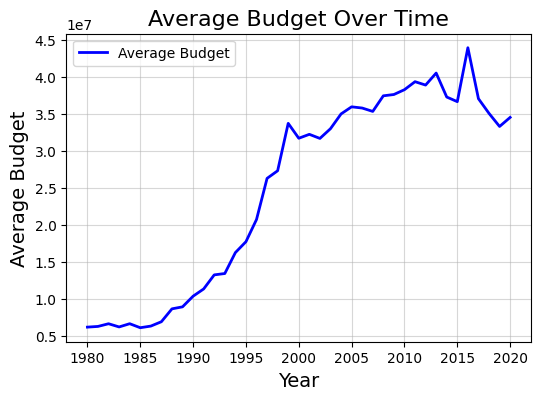

In [37]:
# Plot average budget over the years
plt.figure(figsize=(6, 4))
time_analysis['budget'].plot(label='Average Budget', color='blue', linewidth=2)
plt.title("Average Budget Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Budget", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

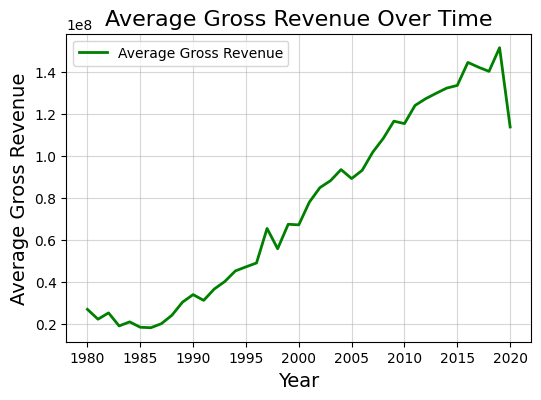

In [38]:
# Plot average gross revenue over the years
plt.figure(figsize=(6, 4))
time_analysis['gross'].plot(label='Average Gross Revenue', color='green', linewidth=2)
plt.title("Average Gross Revenue Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

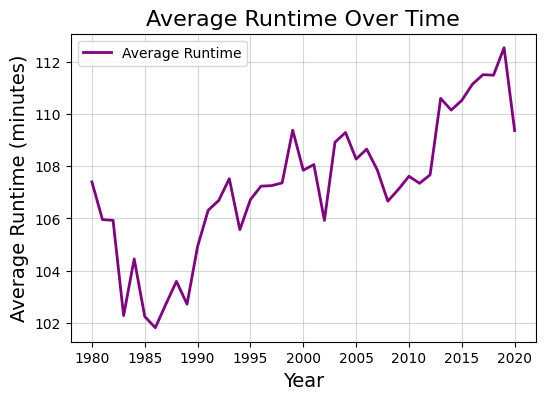

In [39]:
# Plot average runtime over the years
plt.figure(figsize=(6, 4))
time_analysis['runtime'].plot(label='Average Runtime', color='purple', linewidth=2)
plt.title("Average Runtime Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Runtime (minutes)", fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [40]:
# Count the number of movies for each genre per year
genre_trends = df.groupby(['year', 'genre'])['name'].count().unstack()
genre_trends

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,Western
year,,,,,,,,,,,,,,,,,,,
1980,14.0,7.0,2.0,6.0,36.0,4.0,14.0,1.0,1.0,NaN,6.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1981,17.0,11.0,2.0,4.0,29.0,9.0,21.0,NaN,NaN,NaN,17.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1982,21.0,3.0,5.0,5.0,46.0,8.0,21.0,1.0,1.0,NaN,11.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0
1983,31.0,9.0,2.0,5.0,42.0,9.0,31.0,NaN,1.0,1.0,10.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
1984,31.0,13.0,2.0,4.0,63.0,8.0,39.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1985,42.0,19.0,7.0,9.0,66.0,5.0,39.0,2.0,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1986,46.0,12.0,6.0,7.0,63.0,13.0,42.0,1.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1987,39.0,7.0,2.0,7.0,73.0,16.0,36.0,NaN,4.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1988,31.0,10.0,5.0,8.0,76.0,15.0,39.0,NaN,4.0,NaN,9.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN


<Figure size 800x600 with 0 Axes>

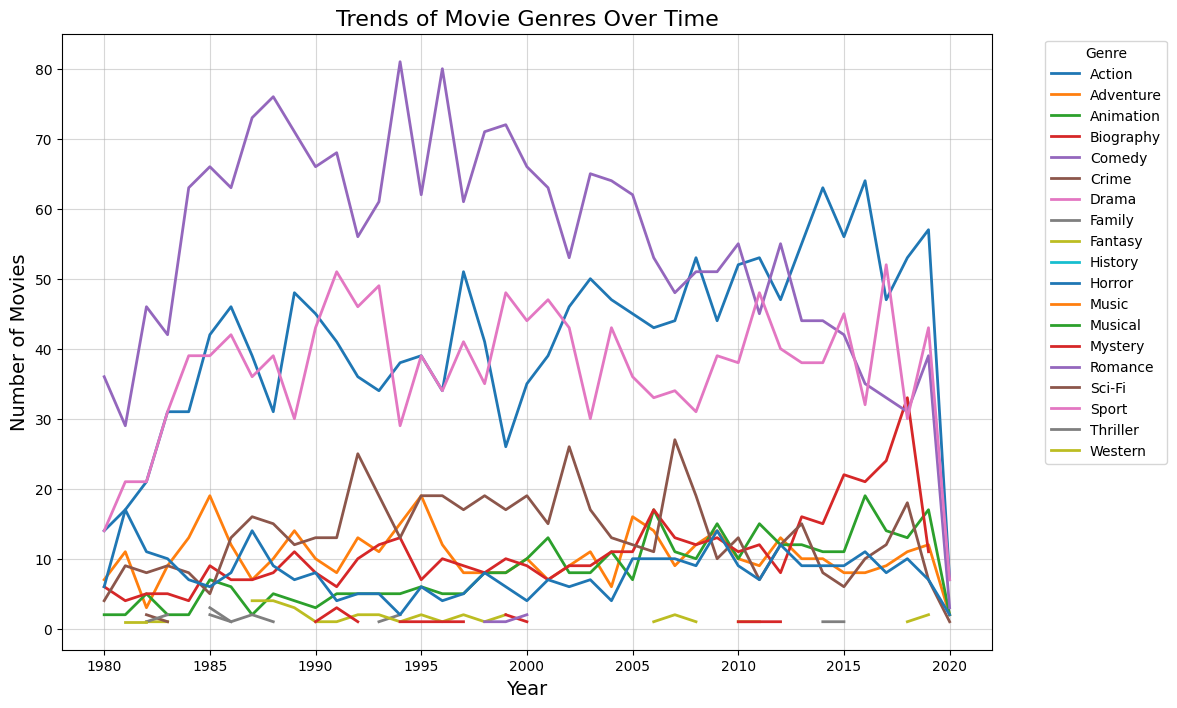

In [41]:
# Plot genre trends over the years
plt.figure(figsize=(8, 6))
genre_trends.plot(kind='line', figsize=(12, 8), linewidth=2)
plt.title("Trends of Movie Genres Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

In [42]:
# Count movies by country
movies_by_country = df['country'].value_counts().head(10)
movies_by_country

country
United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Name: count, dtype: int64

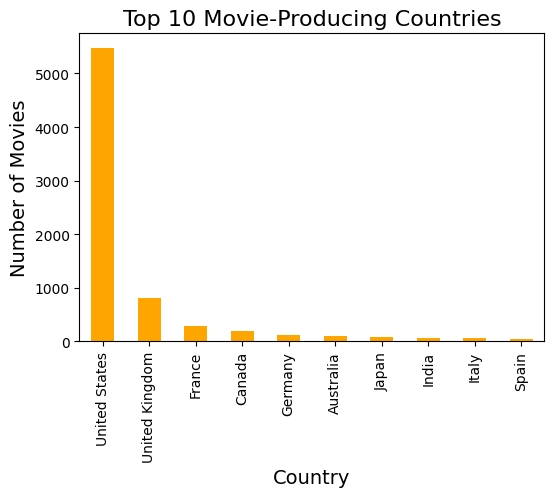

In [43]:
# Plot top 10 movie-producing countries
plt.figure(figsize=(6, 4))
movies_by_country.plot(kind='bar', color='orange')
plt.title("Top 10 Movie-Producing Countries", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.show()

In [44]:
# Group by country and calculate average gross and score
country_analysis = df.groupby('country')[['gross', 'score']].mean().sort_values(by='gross', ascending=False).head(10)
country_analysis 

,gross,score
country,,
Malta,3.527941e+08,6.500000
New Zealand,2.541893e+08,7.420000
China,2.197357e+08,6.702500
Finland,1.691938e+08,6.033333
United Arab Emirates,8.858613e+07,6.000000
United States,8.830297e+07,6.257072
South Africa,7.089849e+07,6.487500
Lebanon,6.441700e+07,8.400000
United Kingdom,5.998799e+07,6.642770


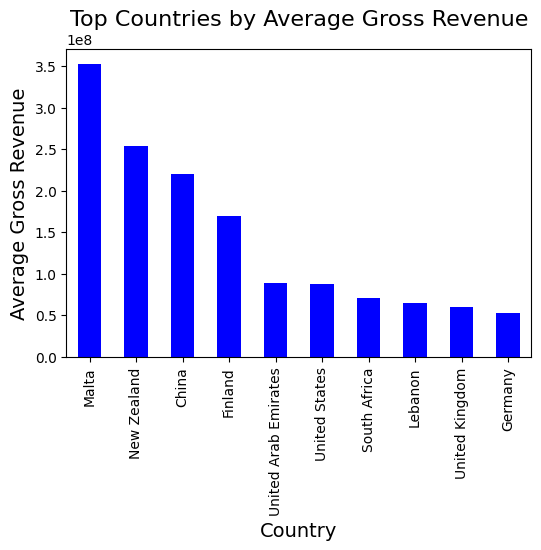

In [45]:
# Plot top countries by average gross revenue
plt.figure(figsize=(6, 4))
country_analysis['gross'].plot(kind='bar', color='blue')
plt.title("Top Countries by Average Gross Revenue", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Gross Revenue", fontsize=14)
plt.show()

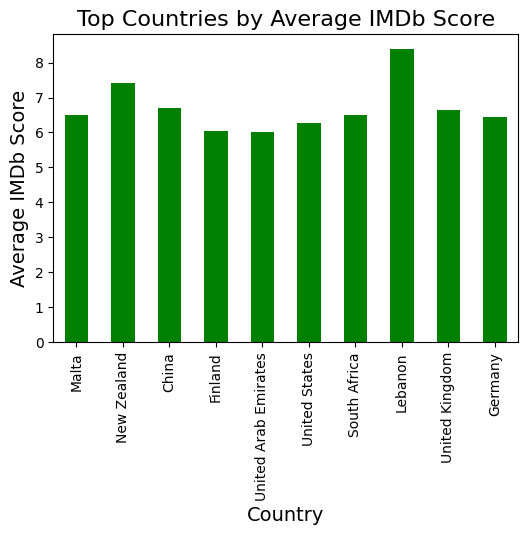

In [46]:
# Plot top countries by average IMDb score
plt.figure(figsize=(6, 4))
country_analysis['score'].plot(kind='bar', color='green')
plt.title("Top Countries by Average IMDb Score", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average IMDb Score", fontsize=14)
plt.show()

In [47]:
# Count the occurrences of each genre
genre_counts = df['genre'].value_counts()
genre_counts

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

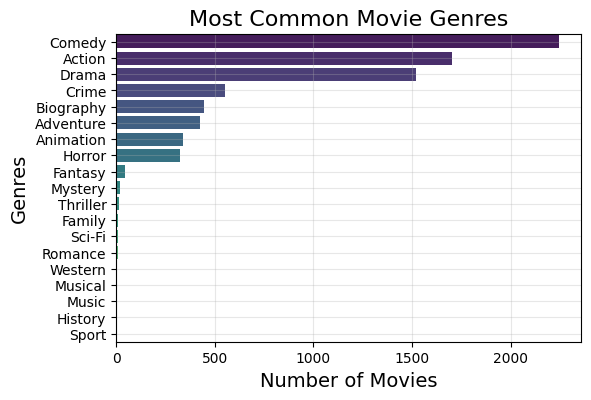

In [48]:
# Plot the most common genres
plt.figure(figsize=(6, 4))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Most Common Movie Genres", fontsize=16)
plt.xlabel("Number of Movies", fontsize=14)
plt.ylabel("Genres", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [49]:
# Find the highest-grossing movies per year
highest_grossing_years = df.groupby('year')['gross'].max()
highest_grossing_years 

year
1980     538375067
1981     389925971
1982     792910554
1983     475106177
1984     333107271
1985     381906762
1986     357288178
1987     320145693
1988     354825435
1989     474171806
1990     505703557
1991     520881154
1992     504050219
1993    1033928303
1994    1083720877
1995     394436586
1996     817400891
1997    2201647264
1998     553709788
1999    1027082707
2000     546388108
2001    1006968171
2002     947495095
2003    1146030912
2004     928760770
2005     896678241
2006    1066179747
2007     960996492
2008    1005973645
2009    2847246203
2010    1066970811
2011    1342321665
2012    1518815515
2013    1281508100
2014    1104054072
2015    2069521700
2016    1153337496
2017    1332698830
2018    2048359754
2019    2797501328
2020     461421559
Name: gross, dtype: int64

In [50]:
df['gross'].max()

2847246203

In [51]:
avg_score_by_star = df.groupby('star')['score'].mean().sort_values(ascending=False).head(10)
avg_score_by_star

star
Alexandre Rodrigues    8.6
Luigi Lo Cascio        8.5
Mark Hamill            8.5
Kay Kay Menon          8.5
Philippe Noiret        8.5
Ben Burtt              8.4
Yôji Matsuda           8.4
Ulrich Mühe            8.4
Anthony Gonzalez       8.4
Zain Al Rafeea         8.4
Name: score, dtype: float64